<a href="https://colab.research.google.com/github/tackulus/229351/blob/main/610510531_LAB03_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science


###ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

####ตัวอย่าง 1: แยกตัวประกอบ (spectral decomposition) ของเมทริกซ์ต่อไปนี้

$$
M=\begin{pmatrix} 3 & 4 & 6 \\ 2 & 4 & 6 \\ 7 & 8 & 3 \end{pmatrix}$$

In [ ]:
import numpy as np

# เริ่มจากตัวอย่าง 3x3 เมทริกซ์

M = np.array([[3,4,6],
              [2,4,6],
              [7,8,3]])

# print(np.mean(M, axis = 0))

M = M - np.mean(M, axis = 0)  #normalize the columns

# print(M)

# np.cov คำนวณ covariance ระหว่างเวกเตอร์แถว แต่เราต้องการ covariance ของ
# เวกเตอร์คอลัมน์ของ A จึงต้องทำการ tranpose ก่อนที่จะใส่ np.cov

A = np.cov(M, rowvar=False) #covariance matrix of M

print(A)

[[ 7.          6.         -4.5       ]
 [ 6.          5.33333333 -4.        ]
 [-4.5        -4.          3.        ]]


In [ ]:
#หา eigenvalues และ eigenvectors ของ A ด้วยฟังก์ชันต่อไปนี้

specA = np.linalg.eigh(A)

print(specA)

(array([ 0.        ,  0.13709533, 15.196238  ]), array([[ 0.        , -0.7377465 , -0.67507785],
       [ 0.6       ,  0.54006228, -0.5901972 ],
       [ 0.8       , -0.40504671,  0.4426479 ]]))


####SpecA มีสมาชิก 2 ตัว  
ตัวที่ 1 คือ Eigenvalues  เรียงจาก**น้อยไปหามาก**  
ตัวที่สองคือ Eigenvectors โดยที่ **แต่ละ column คือ eigenvector แต่ละตัว**

\begin{align*}
\texttt{specA[0]} &=  D=[\lambda_1,\lambda_2,\lambda_3] \\
\texttt{specA[1]} &=  U^T=\begin{pmatrix}\uparrow & \uparrow & \uparrow \\
u_1 & u_2 & u_3 \\
\downarrow & \downarrow & \downarrow
\end{pmatrix}
\end{align*}

In [ ]:
specA

(array([ 0.        ,  0.13709533, 15.196238  ]),
 array([[ 0.        , -0.7377465 , -0.67507785],
        [ 0.6       ,  0.54006228, -0.5901972 ],
        [ 0.8       , -0.40504671,  0.4426479 ]]))

In [ ]:
D = specA[0]
U = specA[1]

print(D)
print(U)

[ 0.          0.13709533 15.196238  ]
[[ 0.         -0.7377465  -0.67507785]
 [ 0.6         0.54006228 -0.5901972 ]
 [ 0.8        -0.40504671  0.4426479 ]]


In [ ]:
#สร้าง diagonal matrix ทีมี eigenvalues ในแนวแทยง

diagD = np.diag(D)

print(diagD)

[[ 0.          0.          0.        ]
 [ 0.          0.13709533  0.        ]
 [ 0.          0.         15.196238  ]]


####ลองเช็คว่าการแยกส่วนประกอบของ A ถูกต้องหรือไม่ดัวยสูตร

$$A =\begin{pmatrix}\uparrow & \uparrow & \uparrow \\
u_1 & u_2 & u_3 \\
\downarrow & \downarrow & \downarrow
\end{pmatrix}\begin{pmatrix}\lambda_1 & 0 & 0 \\
0 & \lambda_2 & 0 \\
0 & 0 & \lambda_3
\end{pmatrix}\begin{pmatrix}\leftarrow & u_1 & \rightarrow \\
\leftarrow & u_2 & \rightarrow \\
\leftarrow & u_3 & \rightarrow
\end{pmatrix}$$ 

In [ ]:
print(A, ' <- A')

print(U@diagD@U.T,' <- U^TDU')

[[ 7.          6.         -4.5       ]
 [ 6.          5.33333333 -4.        ]
 [-4.5        -4.          3.        ]]  <- A
[[ 7.          6.         -4.5       ]
 [ 6.          5.33333333 -4.        ]
 [-4.5        -4.          3.        ]]  <- U^TDU


####ทำ PCA จากข้อมูลที่มีอยู่ 3 มิติให้เหลือ 2 มิติ
1. เริ่มด้วยการหา Eigenvector ที่มีค่า Eigenvalue สูงสุดสองอันดับแรก

In [ ]:
l_1 = D[-1] #eigenvalue ที่มีค่ารองลงมา
l_2 = D[-2] #eigenvalue ที่มีค่าสูงที่สุด

u_1 = U[:,-1] #eigenvector ที่มีค่า eigenvalue รองลงมา
u_2 = U[:,-2] #eigenvector ที่มีค่า eigenvalue สูงที่สุด

#สร้างเมทริกซ์ U_2 ที่มีคอลัมน์ประกอบไปด้วยเวกเตอร์ u_1 and u_2 

U_2 = np.c_[u_1,u_2]
print(u_1, ' <- u_1')
print(u_2, ' <- u_2')
print(U_2, ' <- U_2')

[-0.67507785 -0.5901972   0.4426479 ]  <- u_1
[-0.7377465   0.54006228 -0.40504671]  <- u_2
[[-0.67507785 -0.7377465 ]
 [-0.5901972   0.54006228]
 [ 0.4426479  -0.40504671]]  <- U_2


####ให้ตัวเลขในแต่ละแถวของ $A$ ทำ projection บนเวกเตอร์ $u_1$ และ $u_2$ ทำได้โดย
$$M_2 = M\begin{pmatrix}\uparrow & \uparrow \\
u_1 & u_2  \\
\downarrow & \downarrow 
\end{pmatrix}=\begin{pmatrix} 7 & 6 & -4.5 \\ 6 & 5.3 & -4 \\ -4.5 & -4 & 3 \end{pmatrix}\begin{pmatrix}\uparrow & \uparrow \\
u_1 & u_2  \\
\downarrow & \downarrow 
\end{pmatrix}=\begin{pmatrix}[7 &6  &-4.5]\cdot u_1 &[7 &6  &-4.5]\cdot u_2 \\
[6 &5.3  &-4]\cdot u_1 &[6 &5.3  &-4]\cdot u_2 \\
[-4.5 &-4  &3]\cdot u_1 &[-4.5 &-4  &3]\cdot u_2\end{pmatrix}$$

In [ ]:
M2 = M@U_2 #M คือ matrix ที่มีข้อมูลอยู่
print(M2)

[[ 1.90465535 -0.38738325]
 [ 2.5797332   0.35036324]
 [-4.48438855  0.03702001]]


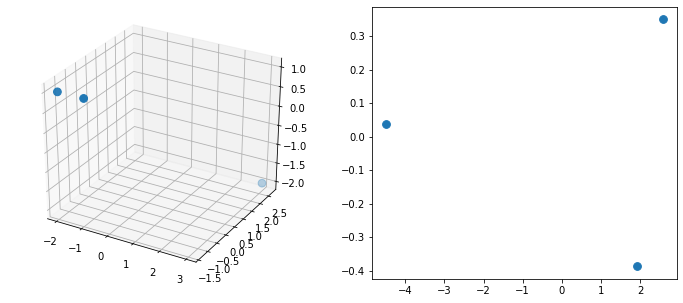

In [ ]:
import matplotlib.pyplot as plt

# Plot initialisation
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(M[:,0], M[:,1], M[:,2],  cmap="Set2_r", s=60);

ax2 = fig.add_subplot(122)
ax2.scatter(M2[:,0], M2[:,1],  cmap="Set2_r", s=60);

####การทำ PCA ด้วย scikit-learn สามารถทำได้ดังนี้

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
B2 = pca.fit_transform(M)
print(B2)

[[-1.90465535  0.38738325]
 [-2.5797332  -0.35036324]
 [ 4.48438855 -0.03702001]]


####ลองดูว่าทิศทางของ principal component มีอะไรบ้าง

In [ ]:
pca.components_

array([[ 0.67507785,  0.5901972 , -0.4426479 ],
       [ 0.7377465 , -0.54006228,  0.40504671]])

####สามารถดูได้ว่าในแต่ละทิศได้อธิบายความแปรปรวนของข้อมูลไปเท่าไหร่

In [ ]:
pca.explained_variance_

array([15.196238  ,  0.13709533])

####หรือสามารถดูเป็นสัดส่วนได้

In [ ]:
pca.explained_variance_ratio_

array([0.991059, 0.008941])